In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
def convert_and_resample(file_path, time_col, watt_col):
    # Load the CSV file
    data = pd.read_csv(file_path)
    
    # Convert the time column to datetime format
    data[time_col] = pd.to_datetime(data[time_col], format='%m/%d/%Y %H:%M')
    
    # Convert watt column from watts to kilowatts
    data['kW'] = data[watt_col] / 1000

    # Set the time column as the index
    data.set_index(time_col, inplace=True)
    
    # Resample the data on an hourly basis and calculate the sum
    hourly_data_sum = data.resample('H').sum()
    
    # Keep only the kilowatt sum column and rename it
    hourly_data_sum = hourly_data_sum[['kW']].rename(columns={'kW': 'kW_hourly'})
    
    # Reorder the columns to have time first
    hourly_data_sum = hourly_data_sum[['kW_hourly']]
    
    return hourly_data_sum

In [3]:
file_path1 = 'Assignment 2 - new.app4.csv'
df1 = convert_and_resample(file_path1, 'time', 'W_min')

In [4]:
def twentyfour_to_zero(date_time_str):
    # Split the date and time parts
    date_part, time_part = date_time_str.split()
    
    # Handle the 24:00:00 case
    if time_part == '24:00:00':
        # Convert to "00:00:00" and increment the day by 1
        time_part = '00:00:00'
        date_obj = datetime.strptime(date_part, '%m/%d') + timedelta(days=1)
        date_part = date_obj.strftime('%m/%d')
    
    return f"{date_part} {time_part}"

def adjust_time_format(file_path, time_col, year):
    data = pd.read_csv(file_path)
    # Apply the adjustment function to the 'Date/Time' column
    data[time_col] = data[time_col].apply(twentyfour_to_zero)
    # Convert the adjusted 'Date/Time' column to datetime format
    data[time_col] = pd.to_datetime(year + ' ' + data[time_col], format='%Y %m/%d %H:%M:%S')

    data = data.rename(columns={time_col: 'time'})

    data.set_index('time', inplace=True)
    
    return data

In [5]:
file_path2 = 'Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv'
df2 = adjust_time_format(file_path2, 'Date/Time', '2013')

In [6]:
# Merge the two dataframes with an outer join to include all time indices
merged_df = pd.merge(df1, df2, left_index=True, right_index=True, how="outer")

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

merged_df['Row_Sum'] = merged_df.sum(axis=1)

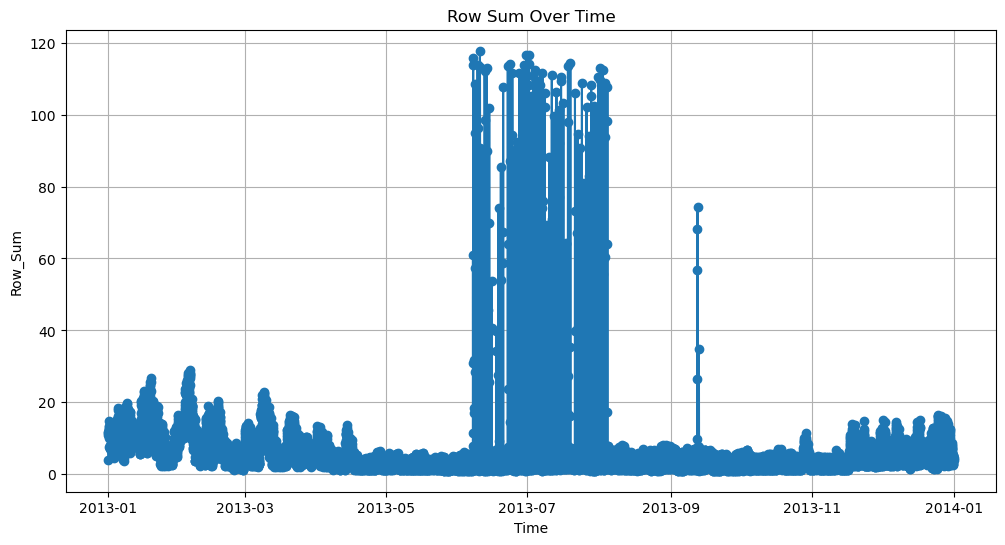

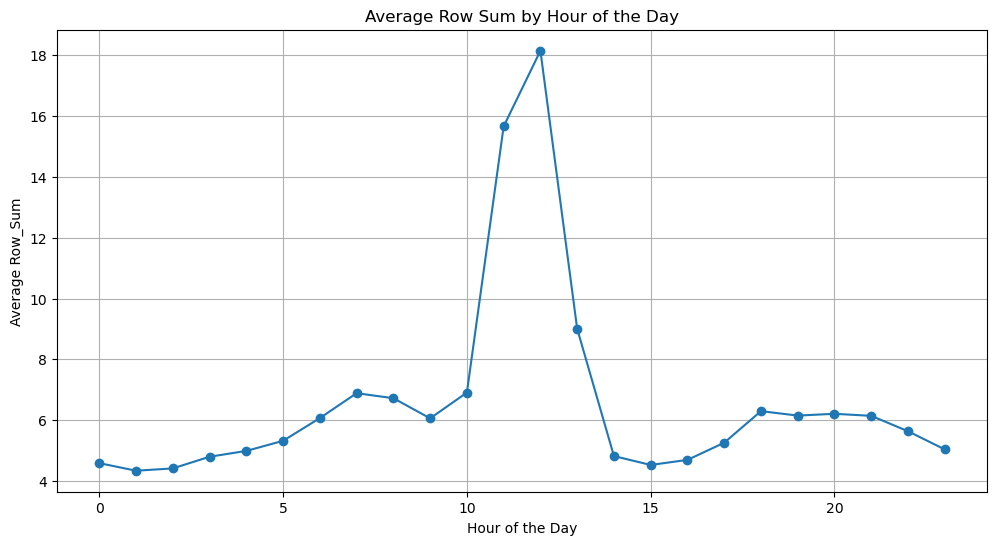

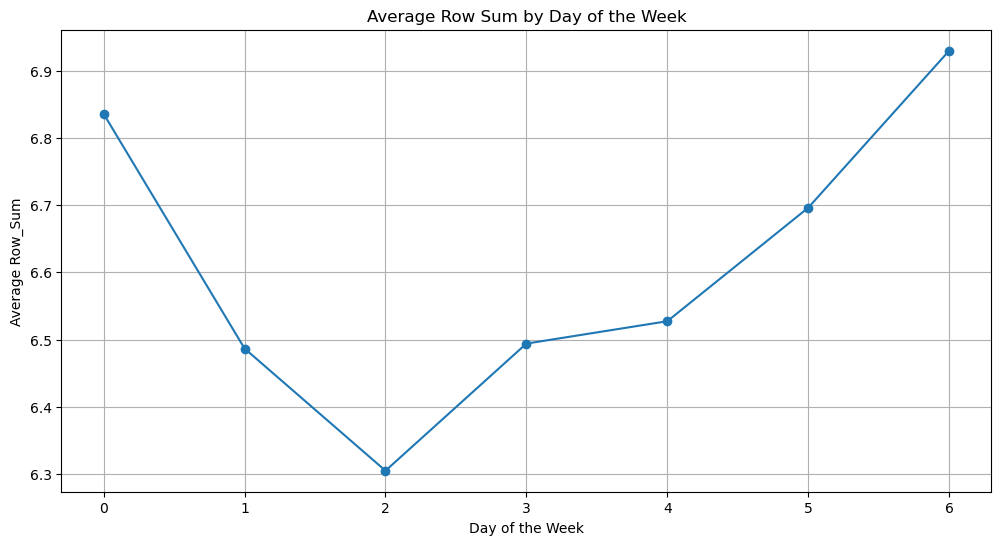

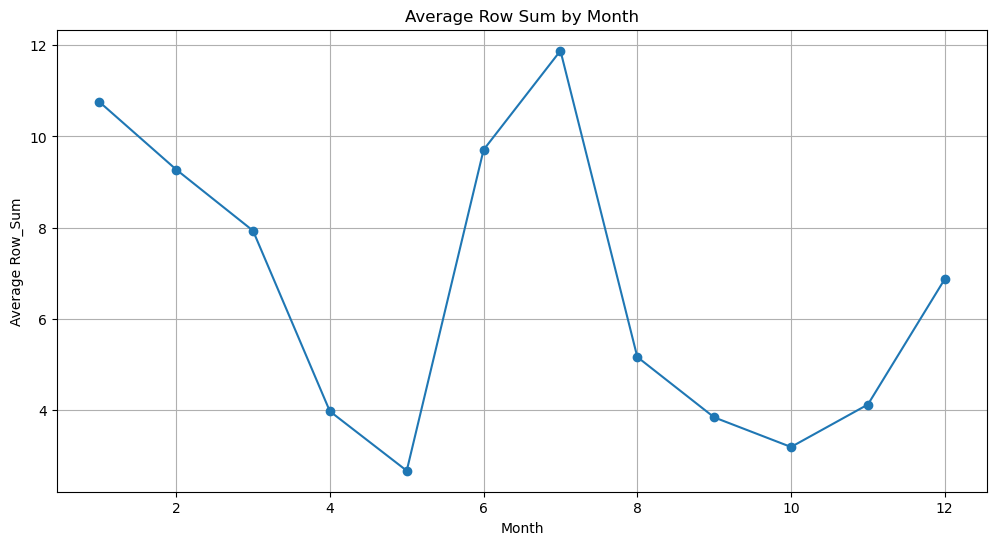

In [7]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['Row_Sum'], marker='o')
plt.xlabel('Time')
plt.ylabel('Row_Sum')
plt.title('Row Sum Over Time')
plt.grid(True)
plt.show()

# Summarize patterns by hour, weekday, and month
merged_df['hour'] = merged_df.index.hour
merged_df['weekday'] = merged_df.index.weekday
merged_df['month'] = merged_df.index.month

# Group by hour
hourly_pattern = merged_df.groupby('hour')['Row_Sum'].mean()

# Group by weekday
weekday_pattern = merged_df.groupby('weekday')['Row_Sum'].mean()

# Group by month
monthly_pattern = merged_df.groupby('month')['Row_Sum'].mean()

# Plot hourly pattern
plt.figure(figsize=(12, 6))
plt.plot(hourly_pattern.index, hourly_pattern, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Row_Sum')
plt.title('Average Row Sum by Hour of the Day')
plt.grid(True)
plt.show()

# Plot weekday pattern
plt.figure(figsize=(12, 6))
plt.plot(weekday_pattern.index, weekday_pattern, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Row_Sum')
plt.title('Average Row Sum by Day of the Week')
plt.grid(True)
plt.show()

# Plot monthly pattern
plt.figure(figsize=(12, 6))
plt.plot(monthly_pattern.index, monthly_pattern, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Row_Sum')
plt.title('Average Row Sum by Month')
plt.grid(True)
plt.show()